## Imports y clases auxiliares

In [49]:
## Math
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, ifft, fftfreq
from RfAnalyze import RfAnalyze
import numpy as np

## Operations
import os
from pathlib import Path
import Pred_tomo as ptom
import Pred_asc as pasc

## Visualization
import matplotlib.pyplot as plt
from PIL import Image
import tifffile as tf

%gui qt

In [50]:
def save_imagen3d(array, pathlibpath,tipo='float',axis=2):
    # Saving 2d array while looping in "z"
    print('Saving array as pic in path')
    if not os.path.exists(str(pathlibpath)):
        os.makedirs(str(pathlibpath))

    for i in range(array.shape[axis]):
        if (axis==0):
            imagen= Image.fromarray(array[i,:,:].astype(tipo))
        elif (axis==1):
            imagen= Image.fromarray(array[:,i,:].astype(tipo))
        elif (axis==2):
            imagen= Image.fromarray(array[:,:,i].astype(tipo))
                
        nombre = str(i).zfill(4) + '.tif'
#         nombre= '{}.tif'.format(i+1)

        ruta_guardado= pathlibpath / nombre
        imagen.save(ruta_guardado)    
    print('Volume saved') 

## Carga volumenes

In [51]:
## Declaring the paths to the folders of work

# Solves the path for any operative system.

# Solves the path for any operative system.
folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp') 
folder_to_save = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

# Name of the files
ruta_data1 = folder_to_read /   'c7_10MHz_backswall_freq_dom_pruebas'

# Assigning images to variables
data = ptom.napari_read_tiff(ruta_data1,folder=True)
image = data[:,:,911]

# Clase

In [52]:
from skimage.transform import resize

class AspectRatio:
    
    def __init__(self):
        
        pass
    
    def ratio(self,x,y,x1,y1,axis = -1):
        
        #Computes new shape for the image where x and y are real measures of the object 
        #x1,y1 are unit per pixel ratios of each dimension in the image
        
        if x1 >= y1:
            
            axis = 0
            
            axis2 = 1
        
        else:
            
            axis = 1
            
            axis2 = 0
        
        sample = [x,y] #sample shape
        image = [x1,y1] #image shape
    
        
        sample_ratio = sample[axis]/sample[axis2]
        image_ratio = image[axis]/image[axis2]
        new_ratio = sample_ratio / image_ratio
        
        if axis: # axis = 1
        
            return (int(x1/new_ratio),y1)
        
        else:
            
            return (x1,int(y1/new_ratio))
        
    def reshape(self,x,y,image): # x y z
        
        if len(image.shape) == 2:
        
            x1 = image.shape[0]
            y1 = image.shape[1]

            new_shape = self.ratio(x,y,x1,y1)

            return resize(image, new_shape)
        
        x1 = image.shape[0]
        y1 = image.shape[1]
        z1 = image.shape[2]

        new_shape = self.ratio(x,y,x1,y1)

        return resize(image, new_shape + (z1,))
                
                
            

# Sobre una sola imagen

In [53]:
a = AspectRatio()

In [54]:
image.shape

(221, 224)

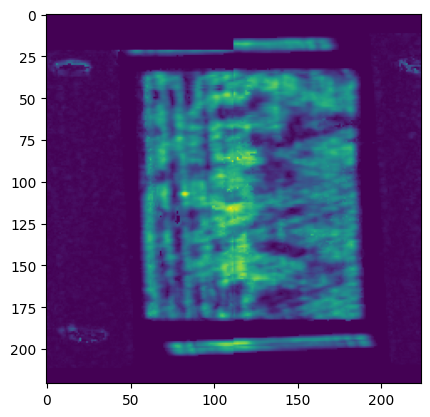

In [55]:
plt.imshow(image)

In [56]:
resized = a.reshape(221,74,image)

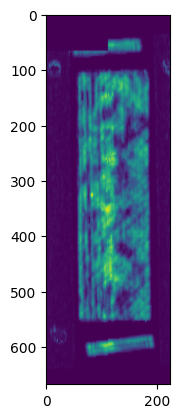

In [57]:
plt.imshow(resized)

In [58]:
tf.imwrite(folder_to_save / "prueba.tiff", resized)

In [59]:
a = (2,3)

b = (1,5,6)

In [60]:
(b[0],) + a

(1, 2, 3)

# Sobre un volumen

In [68]:
a = AspectRatio()

In [62]:
resized = a.reshape(221,74,data)

In [63]:
data.shape

(221, 224, 1082)

In [64]:
resized.shape

(668, 224, 1082)

In [65]:
save_imagen3d(resized,folder_to_save / "prueba")

Saving array as pic in path
Volume saved


In [76]:
c = (30,10)

b = (30,30)

In [77]:
a.ratio(30,10,30,30)

(30, 10)